proses pengambilan dataset dari twitter

In [1]:
import tweepy
import re
import csv
import string
from textblob import TextBlob
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder



api_key = "IkmZpQ98H3P9u3WCGqiq9r3lj"
api_secret_key = "q2BnstqyxXxEJ0ypHUtHVKBWPVvK3K12NAM0bXbEtxoPZ4Z8o5"
access_token = "1329359487858143232-tlinMCMggNwHV2sBfl3lXjy7VUR7vT"
access_token_secret = "PN1bR3Z3zzb59tzjJtjtvEMNgV79cLxQdl6JhoRkUdSGz"

In [ ]:
tweetsPerQry = 1
maxTweets = 10000
search_key = "permendikbud -filter:retweets"
maxId = -1
tweetCount = 0
lang = "en"

auth = tweepy.OAuthHandler(api_key,api_secret_key)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


while tweetCount < maxTweets:
  if maxId <= 0:
    newTweets = api.search(q=search_key, count=tweetsPerQry, tweet_mode="extended",  lang=lang)

  newTweets = api.search(q=search_key, count=tweetsPerQry, tweet_mode="extended",   max_id=str(maxId-1), lang=lang)

  if not newTweets:
    print("Tweets Habis")
    break

  for tweet in newTweets:
    dictTweet = {
        "tanggal" : tweet.created_at,
        "username" : tweet.user.name,
        "tweet" : tweet.full_text
    }  
    
    with open("permen.csv",'a+', newline="")as csv_file:
      fieldNames = ["tanggal","username", "tweet"]
      writer = csv.DictWriter(csv_file, fieldnames= fieldNames , delimiter = ";" )

      writer.writerow(dictTweet)

    tweetCount += len(newTweets)
    maxId = newTweets [-1].id


    

Tweets Habis


In [2]:
# upload file yang sudah di proses

from google.colab import files
uploaded = files.upload()

Saving train1.xlsx to train1.xlsx


In [3]:
data_train = pd.read_excel('train1.xlsx')

data_train.head()

,tanggal,username,tweet
0,2021-12-14 05:53:45,#WE CARE FOR NKRI,Gilee... gilee! because on the basis of consen...
1,2021-12-14 05:50:37,achmad kusnanto,Ini sebenarnya yg dikhawatirkan.... Makanya ul...
2,2021-12-14 05:09:04,KOMAHI FISIP UNRI,The inspection team has also been carried out ...
3,2021-12-14 05:03:04,Umrdyntt. O,@abdulaziz_hfr Assalamu'alaikum Warahmatullahi...
4,2021-12-14 04:49:46,Frisca Rahesha,@abdulaziz_hfr I think that related to Permend...


In [4]:
pd.DataFrame(data_train)

,tanggal,username,tweet
0,2021-12-14 05:53:45,#WE CARE FOR NKRI,Gilee... gilee! because on the basis of consen...
1,2021-12-14 05:50:37,achmad kusnanto,Ini sebenarnya yg dikhawatirkan.... Makanya ul...
2,2021-12-14 05:09:04,KOMAHI FISIP UNRI,The inspection team has also been carried out ...
3,2021-12-14 05:03:04,Umrdyntt. O,@abdulaziz_hfr Assalamu'alaikum Warahmatullahi...
4,2021-12-14 04:49:46,Frisca Rahesha,@abdulaziz_hfr I think that related to Permend...
...,...,...,...
1247,2021-12-13 02:47:04,Digita Nurlia,"@abdulaziz_hfr Number 30/2021, victims will al..."
1248,2021-12-13 02:46:51,Digita Nurlia,@abdulaziz_hfr Due to unbalanced power relatio...
1249,2021-12-13 02:46:33,Digita Nurlia,@abdulaziz_hfr they refused because they faile...
1250,2021-12-13 02:32:40,Digita Nurlia,"@abdulaziz_hfr 30/2021, victims will also beco..."


# Preprocessing

Proses Cleaning

In [5]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r"[^0-9A-Za-z \t]", '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r'hfr', '', text)
  text = re.sub(r'https\S+', ' ', text)
  text = re.sub(r'[^a-zA-Z]', ' ', text)
  text = text.lower()

  return text

In [6]:
data_train['tweet'] = data_train['tweet'].apply(cleanTxt)

# tampil data cleaning

data_train

,tanggal,username,tweet
0,2021-12-14 05:53:45,#WE CARE FOR NKRI,gilee gilee because on the basis of consensual...
1,2021-12-14 05:50:37,achmad kusnanto,ini sebenarnya yg dikhawatirkan makanya ulama ...
2,2021-12-14 05:09:04,KOMAHI FISIP UNRI,the inspection team has also been carried out ...
3,2021-12-14 05:03:04,Umrdyntt. O,assalamualaikum warahmatullahi wabarakatuh im...
4,2021-12-14 04:49:46,Frisca Rahesha,i think that related to permendikbud number ...
...,...,...,...
1247,2021-12-13 02:47:04,Digita Nurlia,number victims will also become perpet...
1248,2021-12-13 02:46:51,Digita Nurlia,due to unbalanced power relations the two wor...
1249,2021-12-13 02:46:33,Digita Nurlia,they refused because they failed to understan...
1250,2021-12-13 02:32:40,Digita Nurlia,victims will also become perpetrators ...


Proses Translate

In [7]:
pip install deep_translator


     |████████████████████████████████| 97 kB 5.0 MB/s 
     |████████████████████████████████| 97 kB 4.9 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.3 which is incompatible.


In [8]:
# from googletrans import Translator
from deep_translator import GoogleTranslator

data_train['tweet_translate'] = data_train['tweet'].apply(GoogleTranslator(source= 'id', target='en').translate)

data_train

,tanggal,username,tweet,tweet_translate
0,2021-12-14 05:53:45,#WE CARE FOR NKRI,gilee gilee because on the basis of consensual...,gilee gilee because on the basis of consensual...
1,2021-12-14 05:50:37,achmad kusnanto,ini sebenarnya yg dikhawatirkan makanya ulama ...,"This is actually what I'm worried about, that'..."
2,2021-12-14 05:09:04,KOMAHI FISIP UNRI,the inspection team has also been carried out ...,the inspection team has also been carried out ...
3,2021-12-14 05:03:04,Umrdyntt. O,assalamualaikum warahmatullahi wabarakatuh im...,assalamualaikum warahmatullahi wabarakatuh im ...
4,2021-12-14 04:49:46,Frisca Rahesha,i think that related to permendikbud number ...,I think that related to Permendikbud number of...
...,...,...,...,...
1247,2021-12-13 02:47:04,Digita Nurlia,number victims will also become perpet...,number victims will also become perpetrators b...
1248,2021-12-13 02:46:51,Digita Nurlia,due to unbalanced power relations the two wor...,due to unbalanced power relations the two word...
1249,2021-12-13 02:46:33,Digita Nurlia,they refused because they failed to understan...,they refused because they failed to understand...
1250,2021-12-13 02:32:40,Digita Nurlia,victims will also become perpetrators ...,victims will also become perpetrators because ...


Polarity

In [46]:
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

data_train["Polarity"] = data_train["tweet_translate"].apply(getPolarity)

data_train

,tanggal,username,tweet,tweet_translate,Polarity,sentimen,tweet_tokenize,tweet_stopwords,tweet_stemming
0,2021-12-14 05:53:45,#WE CARE FOR NKRI,gilee gilee because on the basis of consensual...,gilee gilee because on the basis of consensual...,0.227273,positif,"[gilee, gilee, because, on, the, basis, of, co...",basis consensual make punishment lighter r...,basi consensu make punish lighter rememb minis...
1,2021-12-14 05:50:37,achmad kusnanto,ini sebenarnya yg dikhawatirkan makanya ulama ...,"This is actually what I'm worried about, that'...",-0.083333,negatif,"[This, is, actually, what, I, 'm, worried, abo...",This actually worry ulema reject previous Mini...,thi actual worri ulema reject previou minist e...
2,2021-12-14 05:09:04,KOMAHI FISIP UNRI,the inspection team has also been carried out ...,the inspection team has also been carried out ...,0.150000,positif,"[the, inspection, team, has, also, been, carri...",inspection team also carry ministry result fli...,inspect team also carri ministri result flirt ...
3,2021-12-14 05:03:04,Umrdyntt. O,assalamualaikum warahmatullahi wabarakatuh im...,assalamualaikum warahmatullahi wabarakatuh im ...,0.000000,netral,"[assalamualaikum, warahmatullahi, wabarakatuh,...",assalamualaikum warahmatullahi wabarakatuh uma...,assalamualaikum warahmatullahi wabarakatuh uma...
4,2021-12-14 04:49:46,Frisca Rahesha,i think that related to permendikbud number ...,I think that related to Permendikbud number of...,0.167143,positif,"[I, think, that, related, to, Permendikbud, nu...",think relate Permendikbud number one right pol...,think relat permendikbud number one right poli...
...,...,...,...,...,...,...,...,...,...
1247,2021-12-13 02:47:04,Digita Nurlia,number victims will also become perpet...,number victims will also become perpetrators b...,-0.500000,negatif,"[number, victims, will, also, become, perpetra...",number victims also become perpetrators accusa...,number victim also becom perpetr accus adulter...
1248,2021-12-13 02:46:51,Digita Nurlia,due to unbalanced power relations the two wor...,due to unbalanced power relations the two word...,0.056250,positif,"[due, to, unbalanced, power, relations, the, t...",due unbalance power relations two word also at...,due unbal power relat two word also attempt pr...
1249,2021-12-13 02:46:33,Digita Nurlia,they refused because they failed to understan...,they refused because they failed to understand...,0.137500,positif,"[they, refused, because, they, failed, to, und...",refuse fail understand two keywords sexual vio...,refus fail understand two keyword sexual viole...
1250,2021-12-13 02:32:40,Digita Nurlia,victims will also become perpetrators ...,victims will also become perpetrators because ...,-0.500000,negatif,"[victims, will, also, become, perpetrators, be...",victims also become perpetrators accusations a...,victim also becom perpetr accus adulteri even ...


Labeling

In [13]:
def getAnalisis(skor):
  if skor < 0:
    return 'negatif'
  elif skor == 0:
    return 'netral'
  else:
    return 'positif'

data_train['sentimen'] = data_train['Polarity'].apply(getAnalisis)

data_train

,tanggal,username,tweet,tweet_translate,Polarity,sentimen
0,2021-12-14 05:53:45,#WE CARE FOR NKRI,gilee gilee because on the basis of consensual...,gilee gilee because on the basis of consensual...,0.227273,positif
1,2021-12-14 05:50:37,achmad kusnanto,ini sebenarnya yg dikhawatirkan makanya ulama ...,"This is actually what I'm worried about, that'...",-0.083333,negatif
2,2021-12-14 05:09:04,KOMAHI FISIP UNRI,the inspection team has also been carried out ...,the inspection team has also been carried out ...,0.150000,positif
3,2021-12-14 05:03:04,Umrdyntt. O,assalamualaikum warahmatullahi wabarakatuh im...,assalamualaikum warahmatullahi wabarakatuh im ...,0.000000,netral
4,2021-12-14 04:49:46,Frisca Rahesha,i think that related to permendikbud number ...,I think that related to Permendikbud number of...,0.167143,positif
...,...,...,...,...,...,...
1247,2021-12-13 02:47:04,Digita Nurlia,number victims will also become perpet...,number victims will also become perpetrators b...,-0.500000,negatif
1248,2021-12-13 02:46:51,Digita Nurlia,due to unbalanced power relations the two wor...,due to unbalanced power relations the two word...,0.056250,positif
1249,2021-12-13 02:46:33,Digita Nurlia,they refused because they failed to understan...,they refused because they failed to understand...,0.137500,positif
1250,2021-12-13 02:32:40,Digita Nurlia,victims will also become perpetrators ...,victims will also become perpetrators because ...,-0.500000,negatif


Jumlah Sentimen

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


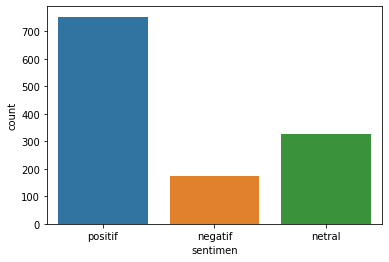

In [14]:
sns.countplot(data_train['sentimen'])

In [20]:
print('Hasil Sentimen')
print('=========================')
print('Positif : ', data_train[data_train['sentimen'] == 'positif']['tweet_translate'].count())
print('Netral  : ', data_train[data_train['sentimen'] == 'netral']['tweet_translate'].count())
print('Negatif : ', data_train[data_train['sentimen'] == 'negatif']['tweet_translate'].count())

Hasil Sentimen
Positif :  753
Netral  :  326
Negatif :  173


In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [17]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Tokenize

In [21]:
def tokenize(txt):
  txt = word_tokenize(txt)
  return txt 

In [22]:
data_train['tweet_tokenize'] = data_train['tweet_translate'].apply(tokenize)

data_train

,tanggal,username,tweet,tweet_translate,Polarity,sentimen,tweet_tokenize
0,2021-12-14 05:53:45,#WE CARE FOR NKRI,gilee gilee because on the basis of consensual...,gilee gilee because on the basis of consensual...,0.227273,positif,"[gilee, gilee, because, on, the, basis, of, co..."
1,2021-12-14 05:50:37,achmad kusnanto,ini sebenarnya yg dikhawatirkan makanya ulama ...,"This is actually what I'm worried about, that'...",-0.083333,negatif,"[This, is, actually, what, I, 'm, worried, abo..."
2,2021-12-14 05:09:04,KOMAHI FISIP UNRI,the inspection team has also been carried out ...,the inspection team has also been carried out ...,0.150000,positif,"[the, inspection, team, has, also, been, carri..."
3,2021-12-14 05:03:04,Umrdyntt. O,assalamualaikum warahmatullahi wabarakatuh im...,assalamualaikum warahmatullahi wabarakatuh im ...,0.000000,netral,"[assalamualaikum, warahmatullahi, wabarakatuh,..."
4,2021-12-14 04:49:46,Frisca Rahesha,i think that related to permendikbud number ...,I think that related to Permendikbud number of...,0.167143,positif,"[I, think, that, related, to, Permendikbud, nu..."
...,...,...,...,...,...,...,...
1247,2021-12-13 02:47:04,Digita Nurlia,number victims will also become perpet...,number victims will also become perpetrators b...,-0.500000,negatif,"[number, victims, will, also, become, perpetra..."
1248,2021-12-13 02:46:51,Digita Nurlia,due to unbalanced power relations the two wor...,due to unbalanced power relations the two word...,0.056250,positif,"[due, to, unbalanced, power, relations, the, t..."
1249,2021-12-13 02:46:33,Digita Nurlia,they refused because they failed to understan...,they refused because they failed to understand...,0.137500,positif,"[they, refused, because, they, failed, to, und..."
1250,2021-12-13 02:32:40,Digita Nurlia,victims will also become perpetrators ...,victims will also become perpetrators because ...,-0.500000,negatif,"[victims, will, also, become, perpetrators, be..."


## Stop Words

In [35]:
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def stopword_removal(txt):
    txt = [item for item in txt if item not in stop_words]    #stopwords
    txt = [lemma.lemmatize(word=w,pos='v') for w in txt]
    txt = [i for i in txt if len(i) > 2]
    txt = ' '.join(txt)
    txt = re.sub(r'gilee', ' ', txt)
    txt = re.sub(r'magpie', ' ', txt)
    return txt

In [36]:
data_train['tweet_stopwords'] = data_train['tweet_tokenize'].apply(stopword_removal)

data_train

,tanggal,username,tweet,tweet_translate,Polarity,sentimen,tweet_tokenize,tweet_stopwords,tweet_stemming
0,2021-12-14 05:53:45,#WE CARE FOR NKRI,gilee gilee because on the basis of consensual...,gilee gilee because on the basis of consensual...,0.227273,positif,"[gilee, gilee, because, on, the, basis, of, co...",basis consensual make punishment lighter r...,basi consensu make punish lighter rememb minis...
1,2021-12-14 05:50:37,achmad kusnanto,ini sebenarnya yg dikhawatirkan makanya ulama ...,"This is actually what I'm worried about, that'...",-0.083333,negatif,"[This, is, actually, what, I, 'm, worried, abo...",This actually worry ulema reject previous Mini...,thi actual worri ulema reject previou minist e...
2,2021-12-14 05:09:04,KOMAHI FISIP UNRI,the inspection team has also been carried out ...,the inspection team has also been carried out ...,0.150000,positif,"[the, inspection, team, has, also, been, carri...",inspection team also carry ministry result fli...,inspect team also carri ministri result flirt ...
3,2021-12-14 05:03:04,Umrdyntt. O,assalamualaikum warahmatullahi wabarakatuh im...,assalamualaikum warahmatullahi wabarakatuh im ...,0.000000,netral,"[assalamualaikum, warahmatullahi, wabarakatuh,...",assalamualaikum warahmatullahi wabarakatuh uma...,assalamualaikum warahmatullahi wabarakatuh uma...
4,2021-12-14 04:49:46,Frisca Rahesha,i think that related to permendikbud number ...,I think that related to Permendikbud number of...,0.167143,positif,"[I, think, that, related, to, Permendikbud, nu...",think relate Permendikbud number one right pol...,think relat permendikbud number one right poli...
...,...,...,...,...,...,...,...,...,...
1247,2021-12-13 02:47:04,Digita Nurlia,number victims will also become perpet...,number victims will also become perpetrators b...,-0.500000,negatif,"[number, victims, will, also, become, perpetra...",number victims also become perpetrators accusa...,number victim also becom perpetr accus adulter...
1248,2021-12-13 02:46:51,Digita Nurlia,due to unbalanced power relations the two wor...,due to unbalanced power relations the two word...,0.056250,positif,"[due, to, unbalanced, power, relations, the, t...",due unbalance power relations two word also at...,due unbal power relat two word also attempt pr...
1249,2021-12-13 02:46:33,Digita Nurlia,they refused because they failed to understan...,they refused because they failed to understand...,0.137500,positif,"[they, refused, because, they, failed, to, und...",refuse fail understand two keywords sexual vio...,refus fail understand two keyword sexual viole...
1250,2021-12-13 02:32:40,Digita Nurlia,victims will also become perpetrators ...,victims will also become perpetrators because ...,-0.500000,negatif,"[victims, will, also, become, perpetrators, be...",victims also become perpetrators accusations a...,victim also becom perpetr accus adulteri even ...


## Stemming

In [37]:
stemmer = PorterStemmer()
def steming(txt):
   txt = word_tokenize(txt,language='english')
   txt = [stemmer.stem(word) for word in txt]
   txt = ' '.join(txt)
   return txt

In [38]:

data_train['tweet_stemming'] = data_train['tweet_stopwords'].apply(steming)

data_train

,tanggal,username,tweet,tweet_translate,Polarity,sentimen,tweet_tokenize,tweet_stopwords,tweet_stemming
0,2021-12-14 05:53:45,#WE CARE FOR NKRI,gilee gilee because on the basis of consensual...,gilee gilee because on the basis of consensual...,0.227273,positif,"[gilee, gilee, because, on, the, basis, of, co...",basis consensual make punishment lighter r...,basi consensu make punish lighter rememb minis...
1,2021-12-14 05:50:37,achmad kusnanto,ini sebenarnya yg dikhawatirkan makanya ulama ...,"This is actually what I'm worried about, that'...",-0.083333,negatif,"[This, is, actually, what, I, 'm, worried, abo...",This actually worry ulema reject previous Mini...,thi actual worri ulema reject previou minist e...
2,2021-12-14 05:09:04,KOMAHI FISIP UNRI,the inspection team has also been carried out ...,the inspection team has also been carried out ...,0.150000,positif,"[the, inspection, team, has, also, been, carri...",inspection team also carry ministry result fli...,inspect team also carri ministri result flirt ...
3,2021-12-14 05:03:04,Umrdyntt. O,assalamualaikum warahmatullahi wabarakatuh im...,assalamualaikum warahmatullahi wabarakatuh im ...,0.000000,netral,"[assalamualaikum, warahmatullahi, wabarakatuh,...",assalamualaikum warahmatullahi wabarakatuh uma...,assalamualaikum warahmatullahi wabarakatuh uma...
4,2021-12-14 04:49:46,Frisca Rahesha,i think that related to permendikbud number ...,I think that related to Permendikbud number of...,0.167143,positif,"[I, think, that, related, to, Permendikbud, nu...",think relate Permendikbud number one right pol...,think relat permendikbud number one right poli...
...,...,...,...,...,...,...,...,...,...
1247,2021-12-13 02:47:04,Digita Nurlia,number victims will also become perpet...,number victims will also become perpetrators b...,-0.500000,negatif,"[number, victims, will, also, become, perpetra...",number victims also become perpetrators accusa...,number victim also becom perpetr accus adulter...
1248,2021-12-13 02:46:51,Digita Nurlia,due to unbalanced power relations the two wor...,due to unbalanced power relations the two word...,0.056250,positif,"[due, to, unbalanced, power, relations, the, t...",due unbalance power relations two word also at...,due unbal power relat two word also attempt pr...
1249,2021-12-13 02:46:33,Digita Nurlia,they refused because they failed to understan...,they refused because they failed to understand...,0.137500,positif,"[they, refused, because, they, failed, to, und...",refuse fail understand two keywords sexual vio...,refus fail understand two keyword sexual viole...
1250,2021-12-13 02:32:40,Digita Nurlia,victims will also become perpetrators ...,victims will also become perpetrators because ...,-0.500000,negatif,"[victims, will, also, become, perpetrators, be...",victims also become perpetrators accusations a...,victim also becom perpetr accus adulteri even ...


In [45]:
data_train.to_excel('data_baru.xlsx')

Word Cloud Positif

<function matplotlib.pyplot.show>

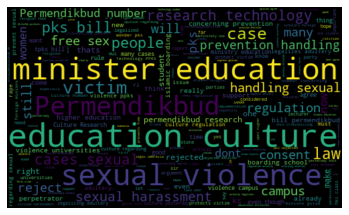

In [ ]:
# wordcloud positif
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allword = ' '.join( [twts for twts in data_train[data_train['sentimen'] == 'positif']['tweet']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allword)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show


Word Cloud Negatif

<function matplotlib.pyplot.show>

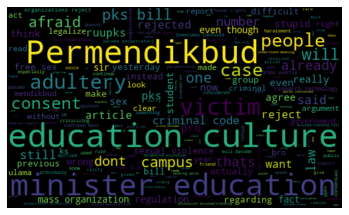

In [ ]:
# wordcloud positif
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allword = ' '.join( [twts for twts in data_train[data_train['sentimen'] == 'negatif']['tweet']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allword)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show

Word Cloud Netral

<function matplotlib.pyplot.show>

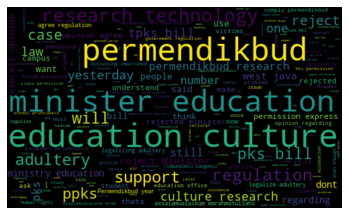

In [ ]:
# wordcloud positif
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allword = ' '.join( [twts for twts in data_train[data_train['sentimen'] == 'netral']['tweet']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allword)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show

In [ ]:
data_train.isnull().sum()

tanggal            0
username           0
tweet              0
Polarity           0
sentimen           0
tweet_tokenize     0
tweet_stopwords    0
tweet_stemming     0
dtype: int64

# SVM

In [ ]:
X = data_train['tweet_stemming']
y = data_train['sentimen']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
X_test

1095    time listen pk bill ministri educ cultur right...
300     assalamualaikum dita dwi prastika number he cl...
806     permendikbud research technolog ppk make way g...
1091    catnobi right good sign statement ministri edu...
1061    gunnn well ma seduct without respons call mini...
                              ...                        
1199    like central leadership aisyiyah islam orma co...
399     that control yesterday loudli oppos permendikb...
328     peopl board school reject minist educ cultur r...
923     that stupid peopl pro-ruu pk permendikbud femi...
437     isnt sad religi leader islam organ interfer ca...
Name: tweet_stemming, Length: 251, dtype: object

In [ ]:
# perform count vectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

In [ ]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test))))

Akurasi untuk c = 0.01: 0.7609561752988048
Akurasi untuk c = 0.05: 0.7768924302788844
Akurasi untuk c = 0.25: 0.8007968127490039
Akurasi untuk c = 0.5: 0.8007968127490039
Akurasi untuk c = 0.75: 0.8047808764940239
Akurasi untuk c = 1: 0.8007968127490039


In [ ]:
svm = LinearSVC(C = 0.75)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
print("akurasi : " , accuracy_score(y_test, y_pred))
print(f'confusion matrix : \n {confusion_matrix(y_test, y_pred)}')
print("\n============================================================\n")
print(classification_report(y_test, y_pred, zero_division=0))

akurasi :  0.8047808764940239
confusion matrix : 
 [[ 21   6  10]
 [  1  46   6]
 [  8  18 135]]


              precision    recall  f1-score   support

     negatif       0.70      0.57      0.63        37
      netral       0.66      0.87      0.75        53
     positif       0.89      0.84      0.87       161

    accuracy                           0.80       251
   macro avg       0.75      0.76      0.75       251
weighted avg       0.82      0.80      0.81       251



# GridSearch

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C = 0.75)
classifier.fit(X_train, y_train)

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear'],'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
accuracy = grid_search.best_score_
accuracy

0.8032079207920791

In [ ]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}